In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

**Table of contents**<a id='toc0_'></a>    
- 1. [**Performing Facial Recognition with Deep Learning**](#toc1_)    
  - 1.1. [**Project Context**](#toc1_1_)    
  - 1.2. [**Project Objectives**](#toc1_2_)    
  - 1.3. [**Project Dataset Description**](#toc1_3_)    
  - 1.4. [**Project Analysis Steps To Perform**](#toc1_4_)    
    - 1.4.1. [**Preliminary analysis**](#toc1_4_1_)    
      - 1.4.1.1. [**Import Modules and Set Default Environment Variables**](#toc1_4_1_1_)    
      - 1.4.1.2. [**Look for corrupt files [Optional]**    ](#toc1_4_1_2_)    
      - 1.4.1.3. [**Rename Files [Optional]** ](#toc1_4_1_3_)    
      - 1.4.1.4. [**Convert File Type [Optional]** ](#toc1_4_1_4_)    
      - 1.4.1.5. [**Plot Sample Images**](#toc1_4_1_5_)    
      - 1.4.1.6. [**Create a validation framework and split the data into train, test, and validation datasets**](#toc1_4_1_6_)    
      - 1.4.1.7. [**Perform necessary transformations to prepare the data for input to the CNN model**](#toc1_4_1_7_)    
      - 1.4.1.8. [**Thing G**](#toc1_4_1_8_)    
      - 1.4.1.9. [**Thing H**](#toc1_4_1_9_)    
      - 1.4.1.10. [**Thing I**](#toc1_4_1_10_)    
    - 1.4.2. [**Train Model with Augmentation**](#toc1_4_2_)    
      - 1.4.2.1. [**Thing A**](#toc1_4_2_1_)    
        - 1.4.2.1.1. [**Plot Hyperparameter Search Results**](#toc1_4_2_1_1_)    
        - 1.4.2.1.2. [**Test Trained Model**](#toc1_4_2_1_2_)    
        - 1.4.2.1.3. [**Thing A.B**](#toc1_4_2_1_3_)    
        - 1.4.2.1.4. [**Thing A.C**](#toc1_4_2_1_4_)    
        - 1.4.2.1.5. [**Thing A.D**](#toc1_4_2_1_5_)    
    - 1.4.3. [**Part 3**](#toc1_4_3_)    
      - 1.4.3.1. [**Thing A**](#toc1_4_3_1_)    
      - 1.4.3.2. [**Thing B**](#toc1_4_3_2_)    
        - 1.4.3.2.1. [**Thing B.A**](#toc1_4_3_2_1_)    
        - 1.4.3.2.2. [**Thing B.A**](#toc1_4_3_2_2_)    
        - 1.4.3.2.3. [**Thing B.C**](#toc1_4_3_2_3_)    
        - 1.4.3.2.4. [**Thing B.D**](#toc1_4_3_2_4_)    
      - 1.4.3.3. [**Thing C**](#toc1_4_3_3_)    
      - 1.4.3.4. [**Thing D**](#toc1_4_3_4_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Table of Contents

-----

# 1. <a id='toc1_'></a>[**Performing Facial Recognition with Deep Learning**](#toc0_)

-----------------------------
## 1.1. <a id='toc1_1_'></a>[**Project Context**](#toc0_)
-----------------------------

You are working for Face2Gene, an American AI company that has developed a 
healthcare app for doctors. The app utilizes deep learning algorithms to aid in diagnosing 
patients for genetic disorders and their variants. It converts patient photos into de-identified 
mathematical facial descriptors, which are then compared to syndrome-specific computational-
based classifiers to determine similarity. The app provides a prioritized list of syndromes with 
similar morphology and suggests phenotypic traits and genes for feature annotation and 
syndrome prioritization. 
  
Management has given priority to empowering and entrusting the in-house AI team. As a new 
member of the team, your task is to build a baseline model for facial recognition. The goal is to 
further enhance the app's existing features and add more value to the business based on this 
baseline model.

-----------------------------
## 1.2. <a id='toc1_2_'></a>[**Project Objectives**](#toc0_)
-----------------------------

Create a facial recognition tool using a relevant deep learning algorithm, leveraging 
the provided resources.

-----------------------------
## 1.3. <a id='toc1_3_'></a>[**Project Dataset Description**](#toc0_)
-----------------------------

The ORL Database of Faces consists of 400 images from 40 different subjects. 
The images were captured at different times, under varying lighting conditions, with different 
facial expressions (open, closed eyes, smiling, not smiling), and with or without glasses. All the 
images have a dark homogeneous background, and the subjects are positioned upright and 
frontal with some tolerance for side movement. Each image has a size of 92x112 pixels and 256 
grey levels per pixel. 
  
Data can be downloaded from the following link: 
https://www.kaggle.com/datasets/kasikrit/att-database-of-faces

-----------------------------------
## 1.4. <a id='toc1_4_'></a>[**Project Analysis Steps To Perform**](#toc0_)
-----------------------------------

The following steps will guide you in building the model. 
  
1. Import the relevant packages and collect all the necessary dependencies. 
  
2. Upload and import the data. 
  
3. View a few images to get a sense of the data. 
  
4. Create a validation framework and split the data into train, test, and validation datasets. 
  
5. Perform necessary transformations to prepare the data for input to the CNN model. 
  
6. Build a CNN model with three main layers: a convolutional layer, a pooling layer, and a fully 
connected layer. You can also consider utilizing state-of-the-art architectures using transfer 
learning. 
  
7. Train the model using the prepared data. 
  
8. Plot the results to evaluate the model's performance. 
  
9. Iterate on the model, making adjustments and improvements, until you achieve an accuracy 
above 90%.



### 1.4.1. <a id='toc1_4_1_'></a>[**Preliminary analysis**](#toc0_)

#### 1.4.1.1. <a id='toc1_4_1_1_'></a>[**Import Modules and Set Default Environment Variables**](#toc0_)

In [1]:
import gc
import glob
import json
import logging
import math
import os
import random
import re
import sys
import traceback
import warnings
from collections import Counter

import cv2
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
import yaml
from dotenv import load_dotenv
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

import keras.backend as K
from keras.applications import (
    EfficientNetB0,
    InceptionV3,
    MobileNetV2,
    ResNet50V2,
    VGG16
)
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess
from keras.callbacks import (
    Callback,
    EarlyStopping,
    LambdaCallback,
    LearningRateScheduler,
    ModelCheckpoint,
    ReduceLROnPlateau
)
from keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    Input,
    MaxPooling2D,
    RandomRotation,
    RandomFlip,
    RandomZoom,
    RandomContrast,
    RandomBrightness,
    RandomTranslation,
    Rescaling
)
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
from keras.optimizers.schedules import ExponentialDecay
from keras.utils import Sequence
from keras.metrics import Precision, Recall, AUC, Metric
from keras.preprocessing import image

# Import Keras Tuner modules
from keras_tuner import (
    Hyperband, 
    HyperModel, 
    HyperParameters, 
    BayesianOptimization, 
    RandomSearch
)

**Explanations:**

- This code block imports necessary libraries (`pandas`, `numpy`, `matplotlib`, and `seaborn`) and reads the three CSV files into pandas DataFrames. It then displays the first few rows of each dataset to give an initial view of the data.

**Why It Is Important:**

- Importing and examining the datasets is crucial as it allows us to understand the structure and content of our data. This step helps identify any immediate issues with data formatting or missing values and provides a foundation for all subsequent analyses.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.2. <a id='toc1_4_1_2_'></a>[**Look for corrupt files [Optional]**](#toc0_)     [&#8593;](#toc0_)

In [ ]:
def verify_images(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif', '.pgm', '.pnm', '.webp')):
                file_path = os.path.join(root, file)
                try:
                    img = Image.open(file_path)
                    img.verify()
                except (IOError, SyntaxError) as e:
                    print(f'Bad file: {file_path}')
                    os.remove(file_path)
                    print(f'Deleted bad file: {file_path}')

# verify_images(f'{DATASET_PATH}/dataset_test')
# verify_images(f'{DATASET_PATH}/structure_dataset')

**Explanations:**

- This code examines the shape, structure, and quality of each dataset. It checks the number of rows and columns, data types of each column, presence of missing values, and existence of duplicate entries.

**Why It Is Important:**

- Understanding the dataset's structure and quality is crucial for data preprocessing and analysis. It helps identify potential issues like missing data or duplicates that need to be addressed before proceeding with the analysis.

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.3. <a id='toc1_4_1_3_'></a>[**Rename Files [Optional]**](#toc0_)  [&#8593;](#toc0_)

In [ ]:
def random_string(length):
    """Generate a random string of fixed length"""
    letters = string.ascii_lowercase + string.digits
    return ''.join(random.choice(letters) for i in range(length))

def rename_files(directory):
    for root, dirs, files in os.walk(directory):
        for filename in files:
            # Generate a unique name
            new_name = str(uuid.uuid4())

            # Get the file extension
            file_extension = os.path.splitext(filename)[1]

            # Create the new filename
            new_filename = f"{new_name}.{file_extension}"

            # Full paths
            old_file = os.path.join(root, filename)
            new_file = os.path.join(root, new_filename)

            # Rename the file
            os.rename(old_file, new_file)
            print(f"Renamed: {filename} -> {new_filename}")

# Uncomment if you want to rename all of the files in the dataset
# directories = [f'{DATASET_PATH}/structures_dataset', f'{DATASET_PATH}/dataset_test']
# for start_directory in directories:
#     rename_files(start_directory)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.4. <a id='toc1_4_1_4_'></a>[**Convert File Type [Optional]**](#toc0_)  [&#8593;](#toc0_)

In [ ]:
def convert_pgm_to_png(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for root, dirs, files in os.walk(input_dir):
        # Create corresponding subdirectories in output_dir
        rel_path = os.path.relpath(root, input_dir)
        output_subdir = os.path.join(output_dir, rel_path)
        os.makedirs(output_subdir, exist_ok=True)
        for filename in files:
            if filename.lower().endswith('.pgm'):
                filepath = os.path.join(root, filename)
                try:
                    with Image.open(filepath) as img:
                        img = img.convert('RGB')  # Convert to RGB
                        new_filename = os.path.splitext(filename)[0] + '.png'
                        output_path = os.path.join(output_subdir, new_filename)
                        img.save(output_path, 'PNG')
                except Exception as e:
                    print(f"Error converting {filepath}: {e}")

# Usage
# input_dir = 'att_faces_pgm'  # Your current dataset path with PGM files
# output_dir = 'att_faces'  # New dataset path for PNG files
convert_pgm_to_png(input_dir, output_dir)

#### 1.4.1.5. <a id='toc1_4_1_5_'></a>[**Plot Sample Images**](#toc0_)

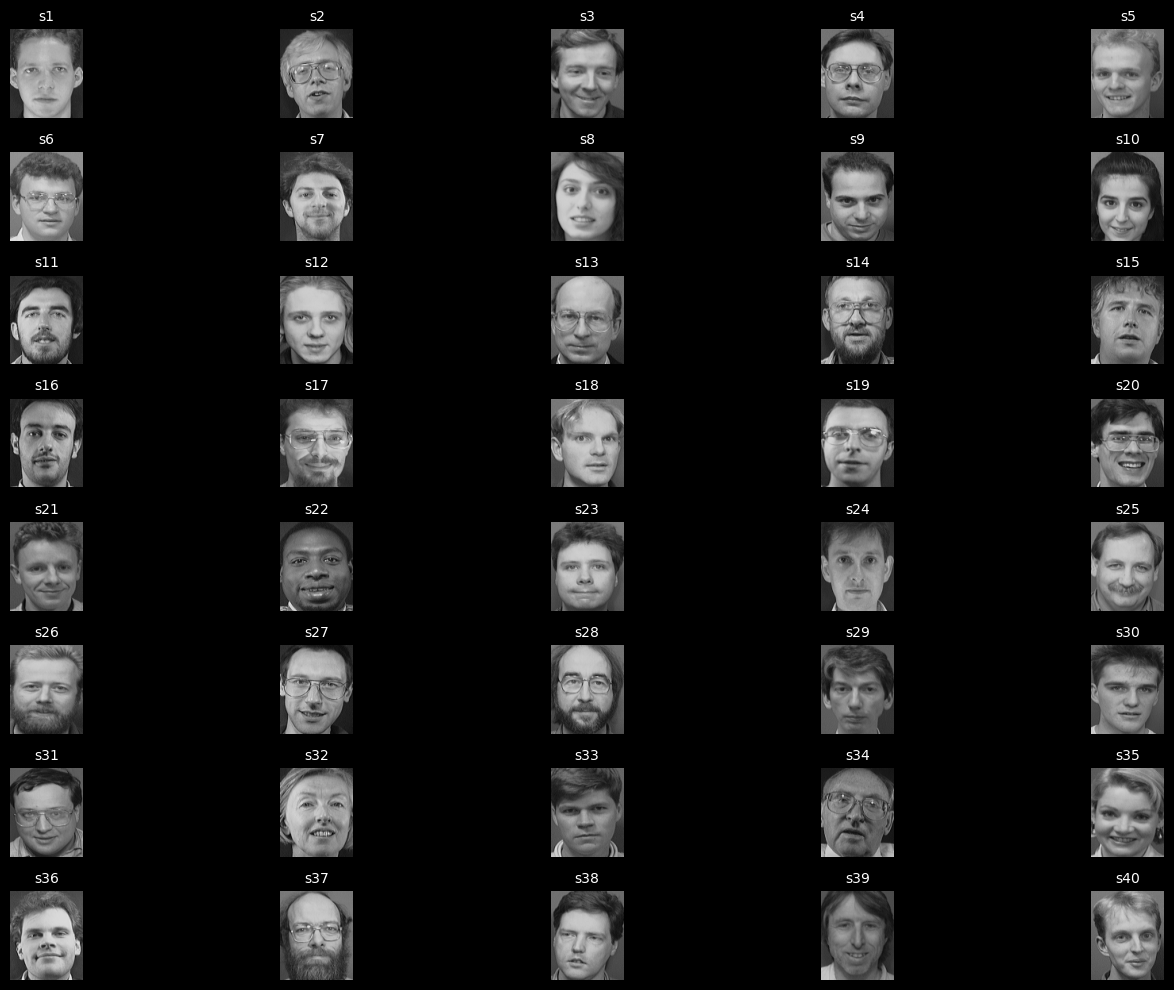

In [10]:
import cv2
import os
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import re

def natural_sort_key(s):
    """Helper function to extract the numerical part from a class name for natural sorting."""
    return int(re.search(r'\d+', s).group())

def plot_sample_images_in_grid(dataset_path, grid_rows=8, grid_cols=5):
    # Collect all classes sorted by natural order (numerical order based on 's1', 's2', ..., 's40')
    classes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))], key=natural_sort_key)

    # Prepare the figure with an 8x5 grid
    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 10))

    # Plot one image per class
    for idx, class_name in enumerate(classes[:grid_rows * grid_cols]):
        class_path = os.path.join(dataset_path, class_name)
        image_name = sorted([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])[0]  # Take the first image
        image_path = os.path.join(class_path, image_name)
        
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        row, col = divmod(idx, grid_cols)  # Calculate row and column position
        axes[row, col].imshow(img)
        axes[row, col].axis('off')
        
        # Set the class name (folder name) as the title for each image
        axes[row, col].set_title(class_name, fontsize=10)

    # Hide any unused subplots (if any)
    for i in range(len(classes), grid_rows * grid_cols):
        row, col = divmod(i, grid_cols)
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.show()

# Mount Google Drive if using Colab
try:
    from google.colab import drive
    drive.mount('/content/drive')
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('COLAB_DATASET_PATH', default='/default/dataset/path')
except ImportError:
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')

plot_sample_images_in_grid(f'{DATASET_PATH}/att_faces/', grid_rows=8, grid_cols=5)


**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.6. <a id='toc1_4_1_6_'></a>[**Create a validation framework and split the data into train, test, and validation datasets**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.7. <a id='toc1_4_1_7_'></a>[**Perform necessary transformations to prepare the data for input to the CNN model**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.8. <a id='toc1_4_1_8_'></a>[**Thing G**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.9. <a id='toc1_4_1_9_'></a>[**Thing H**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.1.10. <a id='toc1_4_1_10_'></a>[**Thing I**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

### 1.4.2. <a id='toc1_4_2_'></a>[**Train Model with Augmentation**](#toc0_)

In [ ]:
# !pip install python-dotenv

In [5]:
import gc
import glob
import json
import logging
import math
import os
import random
import re
import sys
import traceback
import warnings
from collections import Counter

import cv2
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import tensorflow as tf
import yaml
from dotenv import load_dotenv
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

import keras.backend as K
from keras.applications import (
    EfficientNetB0,
    InceptionV3,
    MobileNetV2,
    ResNet50V2,
    VGG16
)
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess
from keras.callbacks import (
    Callback,
    EarlyStopping,
    LambdaCallback,
    LearningRateScheduler,
    ModelCheckpoint,
    ReduceLROnPlateau
)
from keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    Input,
    MaxPooling2D,
    RandomRotation,
    RandomFlip,
    RandomZoom,
    RandomContrast,
    RandomBrightness,
    RandomTranslation,
    Rescaling
)
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD
from keras.optimizers.schedules import ExponentialDecay
from keras.utils import Sequence
from keras.metrics import Precision, Recall, AUC, Metric
from keras.preprocessing import image

# Import Keras Tuner modules
from keras_tuner import (
    Hyperband, 
    HyperModel, 
    HyperParameters, 
    BayesianOptimization, 
    RandomSearch
)

class F1Score(Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision(name='precision')
        self.recall = Recall(name='recall')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Update the precision and recall variables
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        # Compute the F1 score
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_states(self):
        # Reset the state of the metrics
        self.precision.reset_states()
        self.recall.reset_states()

# Define mappings for architectures and preprocessing functions
ARCHITECTURES = {
    'ResNet50V2': ResNet50V2,
    'VGG16': VGG16,
    'InceptionV3': InceptionV3,
    'MobileNetV2': MobileNetV2,
    'EfficientNetB0': EfficientNetB0
}

PREPROCESSING_FUNCTIONS = {
    'resnet_preprocess': resnet_preprocess,
    'vgg_preprocess': vgg_preprocess,
    'inception_preprocess': inception_preprocess,
    'mobilenet_preprocess': mobilenet_preprocess,
    'efficientnet_preprocess': efficientnet_preprocess
}

# Define metrics mapping
METRICS = {
    'Precision': Precision(name='precision'),
    'Recall': Recall(name='recall'),
    'AUC': AUC(name='auc'),
    'F1Score': F1Score(name='f1_score')
}

class AccuracyCallback(Callback):
    def __init__(self, target_accuracy):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') >= self.target_accuracy:
            print(f"\nReached {self.target_accuracy*100}% validation accuracy. Stopping training.")
            print()
            print("--------------------")
            print()
            self.model.stop_training = True

class CustomValidationCallback(Callback):
    def __init__(self, validation_data, validation_steps):
        super().__init__()
        self.validation_data = validation_data
        self.validation_steps = validation_steps

    def on_epoch_end(self, epoch, logs=None):
        val_loss = 0
        val_accuracy = 0
        for x, y in self.validation_data.take(self.validation_steps):
            val_metrics = self.model.test_on_batch(x, y)
            val_loss += val_metrics[0]
            val_accuracy += val_metrics[1]

        val_loss /= self.validation_steps
        val_accuracy /= self.validation_steps

        logs['val_loss'] = val_loss
        logs['val_accuracy'] = val_accuracy
        logger.debug(f"Epoch {epoch + 1} - Custom validation:")
        logger.debug(f"Loss: {val_loss:.4f}")
        logger.debug(f"Accuracy: {val_accuracy:.4f}")

class DatasetLogger(Callback):
    def __init__(self, train_dataset, val_dataset):
        super().__init__()
        self.train_dataset = train_dataset
        self.val_dataset = val_dataset

    def on_epoch_begin(self, epoch, logs=None):
        logger.debug(f"Epoch {epoch + 1} - Train samples: {tf.data.experimental.cardinality(self.train_dataset)}")
        logger.debug(f"Epoch {epoch + 1} - Val samples: {tf.data.experimental.cardinality(self.val_dataset)}")

    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            logger.debug(f"Epoch {epoch + 1} - Train accuracy: {logs.get('accuracy', 'N/A'):.4f}")
            logger.debug(f"Epoch {epoch + 1} - Val accuracy: {logs.get('val_accuracy', 'N/A'):.4f}")

class DebugCallback(Callback):
    def on_epoch_begin(self, epoch, logs=None):
        logger.debug(f"Starting epoch {epoch + 1}\n")

    def on_batch_begin(self, batch, logs=None):
        if batch % 100 == 0:
            # logger.debug(f"Starting batch {batch}\n")
            pass

    def on_epoch_end(self, epoch, logs=None):
        logger.debug(f"End of epoch {epoch + 1}\n")
        if logs:
            for key, value in logs.items():
                logger.debug(f"{key}: {value}")
        logger.debug("--------------------\n")

class DataGenerator:
    def __init__(self, config):
        logger.debug(f"DataGenerator initialization starting.")
        self.config = config
        self.batch_size = config['data']['batch_size']
        self.input_shape = tuple(config['data']['input_shape'])
        self.target_size = tuple(config['data']['target_size'])
        self.color_mode = config['data'].get('color_mode', 'rgb')
        self.preprocessing_function_name = config['data']['preprocessing_function']
        
        # Determine preprocessing function
        use_pretrained_weights = config['model'].get('use_pretrained_weights', True)
        if use_pretrained_weights:
            self.preprocessing_function = PREPROCESSING_FUNCTIONS[config['data']['preprocessing_function']]
        else:
            # When training from scratch you may choose to use a simple rescaling
            self.preprocessing_function = lambda x: x / 255.0  # Or define a custom function
            
        self.augmentation_params = config['augmentation']
        self.pre_split = config['data'].get('pre_split', True)

        logger.debug(f'DG batch_size = {self.batch_size}')
        logger.debug(f'DG target_zie = {self.target_size}')
        logger.debug(f'DG preprocessing_function = {self.preprocessing_function_name}')
        logger.debug(f'DG augmentation_params = {self.augmentation_params}')
        logger.debug(f'DG pre_split = {self.pre_split}')

        # Create data augmentation and rescaling layers
        self.data_augmentation = self.create_data_augmentation()
        self.rescale_layer = self.create_rescale_layer()

        if self.pre_split:
            logger.debug("DG Calling load_pre_split_data function.")
            self.load_pre_split_data()
        else:
            self.load_and_split_data()

    def load_pre_split_data(self):
        # Paths for pre-split data
        logger.debug("DG LPSD Starting load_pre_split_data function.")
        self.train_path = self.config['data']['train_path']
        logger.debug(f"DG LPSD Train path: {self.train_path}")
        self.test_path = self.config['data']['test_path']
        logger.debug(f"DG LPSD Test path: {self.test_path}")

        # Validate paths
        if not os.path.exists(self.train_path):
            raise FileNotFoundError(f"DG LPSD Training path not found: {self.train_path}")
        if not os.path.exists(self.test_path):
            raise FileNotFoundError(f"DG LPSD Testing path not found: {self.test_path}")

        # Load datasets
        logger.debug("DG LPSD Loading train_dataset datasets")
        self.train_dataset = tf.keras.utils.image_dataset_from_directory(
            self.train_path,
            label_mode='categorical',
            batch_size=None,  # Load as individual samples
            image_size=self.target_size,
            color_mode=self.color_mode,
            shuffle=True
        )

        logger.debug("DG LPSD Loading test_dataset datasets")  
        self.test_dataset = tf.keras.utils.image_dataset_from_directory(
            self.test_path,
            label_mode='categorical',
            batch_size=None,
            image_size=self.target_size,
            color_mode=self.color_mode,
            shuffle=False
        )

        train_dataset_unbatched = self.train_dataset
        test_dataset_unbatched = self.test_dataset

        self.class_names = self.train_dataset.class_names

        logger.debug(f"DG LPSD Class names: {self.class_names}")

        # Prepare datasets
        logger.debug("DG LPSD Preparing datasets")
        self.train_dataset = self.prepare_dataset(self.train_dataset, augment=True)
        logger.debug("DG LPSD Train dataset prepared.")
        self.val_dataset = self.prepare_dataset(self.test_dataset, augment=False)
        logger.debug("DG LPSD Val dataset prepared.")
        self.test_dataset = self.val_dataset  # Use the validation dataset for testing if appropriate
        logger.debug("DG LPSD Test dataset prepared.")

        # Compute sample counts
        self.train_sample_count = tf.data.experimental.cardinality(train_dataset_unbatched).numpy()
        self.val_sample_count = tf.data.experimental.cardinality(test_dataset_unbatched).numpy()
        self.steps_per_epoch = math.ceil(self.train_sample_count / self.batch_size)
        self.validation_steps = math.ceil(self.val_sample_count / self.batch_size)
        
        # Compute class counts directly from the dataset's file paths
        self.class_counts = self.count_samples_from_directories(self.train_path, self.class_names)
        
        # Compute class weights
        self.class_weight_dict = compute_class_weights_from_counts(self.class_counts, self.class_names)
        
        print(f'\nDG LPSD Train path: {self.train_path}')
        print(f'DG LPSD Test path: {self.test_path}')
        print(f'DG LPSD Batch size: {self.batch_size}')
        print(f'DG LPSD Input shape: {self.input_shape}')
        print(f'DG LPSD color_mode: {self.color_mode}')
        print(f'DG LPSD Target size: {self.target_size}')
        print(f'DG LPSD steps_per_epoch: {self.steps_per_epoch}')
        print(f'DG LPSD validation_steps: {self.validation_steps}')
        print(f'DG LPSD Preprocessing function: {self.preprocessing_function_name}')
        print(f'DG LPSD Augmentation params: {self.augmentation_params}')
        print(f'DG LPSD Class names: {self.class_names}')
        print(f'DG LPSD Class counts: {self.class_counts}')
        print(f'DG LPSD Class weights: {self.class_weight_dict}')
        print(f'DG LPSD Training set size: {self.train_sample_count}')
        print(f'DG LPSD Validation set size: {self.val_sample_count}')
        print(f'DG LPSD Testing set size: {self.val_sample_count}\n')

    def count_samples_from_directories(self, dataset_path, class_names):
        import os
        counts = {}
        for class_name in class_names:
            class_dir = os.path.join(dataset_path, class_name)
            if os.path.isdir(class_dir):
                counts[class_name] = len([
                    fname for fname in os.listdir(class_dir)
                    if os.path.isfile(os.path.join(class_dir, fname))
                ])
            else:
                counts[class_name] = 0
        return counts

    def load_and_split_data(self):
        logger.debug("DG LASD Getting Class Names.")
        self.class_names = [
            d for d in sorted(os.listdir(self.config['data']['dataset_path']))
            if os.path.isdir(os.path.join(self.config['data']['dataset_path'], d))
        ]
        logger.debug(f"DG LASD Class Names: {self.class_names}")
        class_indices = {name: index for index, name in enumerate(self.class_names)}
        logger.debug(f"DG LASD Class Indices: {class_indices}")

        # Collect file paths and labels
        file_paths = []
        labels = []
        for class_name in self.class_names:
            class_dir = os.path.join(self.config['data']['dataset_path'], class_name)
            class_files = glob.glob(os.path.join(class_dir, '*'))
            file_paths.extend(class_files)
            labels.extend([class_indices[class_name]] * len(class_files))

        file_paths = np.array(file_paths)
        labels = np.array(labels)

        # First split: train and temp (val + test)
        logger.debug("DG LASD Splitting data into train and temp sets.")
        train_paths, temp_paths, train_labels, temp_labels = train_test_split(
            file_paths, labels,
            test_size=0.3,
            stratify=labels,
            random_state=42
        )

        # Second split: validation and test
        logger.debug("DG LASD Splitting temp data into val and test sets.")
        val_paths, test_paths, val_labels, test_labels = train_test_split(
            temp_paths, temp_labels,
            test_size=0.5,
            stratify=temp_labels,
            random_state=42
        )

        # Mapping indices back to class names for readability
        index_to_class = {index: name for name, index in class_indices.items()}

        # Training set class distribution
        train_class_counts = Counter(train_labels)
        train_class_counts_named = {index_to_class[k]: v for k, v in train_class_counts.items()}
        logger.debug(f"DG LASD Training class distribution: {train_class_counts_named}")

        # Validation set class distribution
        val_class_counts = Counter(val_labels)
        val_class_counts_named = {index_to_class[k]: v for k, v in val_class_counts.items()}
        logger.debug(f"DG LASD Validation class distribution: {val_class_counts_named}")

        # Test set class distribution
        test_class_counts = Counter(test_labels)
        test_class_counts_named = {index_to_class[k]: v for k, v in test_class_counts.items()}
        logger.debug(f"DG LASD Test class distribution: {test_class_counts_named}")

        # Store the training class counts as an attribute
        self.class_counts = train_class_counts_named

        # Create datasets from file paths and labels
        logger.debug("DG LASD Creating datasets from file paths and labels.")
        train_dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
        val_dataset = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
        test_dataset = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))

        # Get color_mode from config (default to 'rgb')
        color_mode = self.config['data'].get('color_mode', 'rgb').lower()

        # Set the number of channels based on color mode
        channels = 3 if color_mode == 'rgb' else 1

        # Define the load_image function inside the method
        def load_image(file_path, label):
            # Read the image from file
            image = tf.io.read_file(file_path)
            # Decode the image data (supports JPEG, PNG, BMP, and GIF)
            image = tf.image.decode_image(image, channels=channels)
            # Set static shape if possible
            if channels == 3:
                image.set_shape([None, None, 3])
            else:
                image.set_shape([None, None, 1])
            # Convert image to float32 and resize
            image = tf.image.convert_image_dtype(image, tf.float32)
            # Resize image to target size
            image = tf.image.resize(image, self.target_size)
            # Apply preprocessing function if specified
            if self.preprocessing_function:
                image = self.preprocessing_function(image)
            else: 
                # Default normalization if no preprocessing function is specified
                image = image / 255.0
            
            # One-hot encode the label
            label = tf.one_hot(label, depth=len(self.class_names))
            return image, label

        # Map function to load images from file paths
        logger.debug("DG LASD Mapping load_image function to datasets.")
        train_dataset = train_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
        val_dataset = val_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
        test_dataset = test_dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)

        # Prepare datasets
        logger.debug("DG LASD Preparing datasets.")
        self.train_dataset = self.prepare_dataset(train_dataset, augment=True)
        self.val_dataset = self.prepare_dataset(val_dataset, augment=False)
        self.test_dataset = self.prepare_dataset(test_dataset, augment=False)

        # Compute sample counts
        logger.debug("DG LASD Computing sample counts.")
        self.train_sample_count = len(train_paths)
        self.val_sample_count = len(val_paths)
        self.test_sample_count = len(test_paths)

        self.steps_per_epoch = math.ceil(self.train_sample_count / self.batch_size)
        self.validation_steps = math.ceil(self.val_sample_count / self.batch_size)
        self.test_steps = math.ceil(self.test_sample_count / self.batch_size)
        
        # Compute class counts directly from the dataset's file paths
        self.class_counts = self.count_samples_from_directories(self.config['data']['dataset_path'], self.class_names)
        
        print(f'\nDG LASD Batch size: {self.batch_size}')
        print(f'DG LASD Input shape: {self.input_shape}')
        print(f'DG LASD color_mode: {self.color_mode}')
        print(f'DG LASD Target size: {self.target_size}')
        print(f'DG LASD Steps per epoch: {self.steps_per_epoch}')
        print(f'DG LASD Validation steps: {self.validation_steps}')
        print(f'DG LASD Test steps: {self.test_steps}')
        print(f'DG LASD Augmentation params: {self.augmentation_params}')
        print(f'DG LASD Class names: {self.class_names}')
        print(f'DG LASD Class counts: {self.class_counts}')
        print(f'DG LASD Training sample size: {self.train_sample_count}')
        print(f'DG LASD Training class distribution: {train_class_counts_named}')
        print(f'DG LASD Validation sample size: {self.val_sample_count}')
        print(f'DG LASD Validation class distribution: {val_class_counts_named}')
        print(f'DG LASD Test sample size: {self.test_sample_count}')
        print(f'DG LASD Test class distribution: {test_class_counts_named}')
        
    def split_dataset(self):
        # Calculate dataset size
        dataset_size = tf.data.experimental.cardinality(self.dataset).numpy()

        # Define split sizes
        train_size = int(0.7 * dataset_size)
        val_size = int(0.15 * dataset_size)
        test_size = dataset_size - train_size - val_size

        # Shuffle and split
        self.dataset = self.dataset.shuffle(buffer_size=dataset_size, seed=42)
        train_dataset = self.dataset.take(train_size)
        val_test_dataset = self.dataset.skip(train_size)
        val_dataset = val_test_dataset.take(val_size)
        test_dataset = val_test_dataset.skip(val_size)

        logger.debug(f"DG SD Dataset size: {dataset_size}")
        logger.debug(f"DG SD Training size: {train_size}")
        logger.debug(f"DG SD Validation size: {val_size}")
        logger.debug(f"DG SD Test size: {test_size}")

        return train_dataset, val_dataset, test_dataset

    def prepare_dataset(self, dataset, augment):
        if augment:
            try:
                dataset = dataset.map(self.augment, num_parallel_calls=tf.data.AUTOTUNE)
                dataset = dataset.shuffle(1000).repeat()
            except Exception as e:
                logger.error(f"DG SD An error occurred trying to prepare dataset with augment true: {e}")
                logger.debug(traceback.format_exc())
        else:
            dataset = dataset.map(self.normalize_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
            dataset = dataset.cache()
        dataset = dataset.batch(self.batch_size).prefetch(tf.data.AUTOTUNE)
        return dataset

    def get_dataset_size(self, dataset):
        return tf.data.experimental.cardinality(dataset).numpy() * self.batch_size

    def create_data_augmentation(self):
        layers = []
        augmentation_params = self.augmentation_params

        # Apply augmentations based on parameters
        if augmentation_params.get('rotation_range'):
            rotation_range = augmentation_params['rotation_range']
            factor = rotation_range / 360.0  # Convert degrees to fraction of full circle
            # Ensure factor is within [-1.0, 1.0]
            factor = max(min(factor, 1.0), -1.0)
            layers.append(RandomRotation(factor=(-factor, factor)))

        if augmentation_params.get('horizontal_flip'):
            layers.append(RandomFlip(mode='horizontal'))

        if augmentation_params.get('vertical_flip'):
            layers.append(RandomFlip(mode='vertical'))

        if augmentation_params.get('zoom_range'):
            zoom = augmentation_params['zoom_range']
            # RandomZoom expects height_factor and width_factor in [-1.0, 1.0]
            # Ensure zoom is within [0.0, 1.0] to avoid invalid factors
            zoom = max(min(zoom, 1.0), 0.0)
            layers.append(RandomZoom(height_factor=(-zoom, zoom), width_factor=(-zoom, zoom)))

        if augmentation_params.get('width_shift_range') or augmentation_params.get('height_shift_range'):
            width_shift = augmentation_params.get('width_shift_range', 0.0)
            height_shift = augmentation_params.get('height_shift_range', 0.0)
            # RandomTranslation expects height_factor and width_factor in [-1.0, 1.0]
            width_shift = max(min(width_shift, 1.0), -1.0)
            height_shift = max(min(height_shift, 1.0), -1.0)
            layers.append(RandomTranslation(height_factor=height_shift, width_factor=width_shift))

        if augmentation_params.get('brightness_range'):
            brightness = augmentation_params['brightness_range']
            # RandomBrightness expects factor in [0.0, inf), but to avoid extreme brightness, cap it
            brightness = max(brightness, 0.0)
            layers.append(RandomBrightness(factor=brightness))

        if augmentation_params.get('contrast_range'):
            contrast = augmentation_params['contrast_range']
            # RandomContrast expects factor in [0.0, inf), but to avoid extreme contrast, cap it
            contrast = max(contrast, 0.0)
            layers.append(RandomContrast(factor=contrast))
            
        if not layers:
            layers.append(tf.keras.layers.Lambda(lambda x: x))

        data_augmentation = tf.keras.Sequential(layers)
        return data_augmentation

    def create_rescale_layer(self):
        # Define which preprocessing functions expect which input ranges
        preprocess_0_255 = [resnet_preprocess, vgg_preprocess]
        preprocess_0_1 = [efficientnet_preprocess]
        preprocess_minus1_1 = [mobilenet_preprocess, inception_preprocess]

        if self.preprocessing_function in preprocess_0_255:
            # No rescaling needed; images are already in [0, 255]
            return None
        elif self.preprocessing_function in preprocess_0_1:
            # Rescaling needed to bring images to [0, 1]
            return Rescaling(1./255)
        elif self.preprocessing_function in preprocess_minus1_1:
            # Rescaling needed to bring images to [0, 1]; preprocessing function will scale to [-1, 1]
            return Rescaling(1./255)
        else:
            # Default to rescaling to [0, 1]
            return Rescaling(1./255)

    def augment(self, images, labels):
        # Different preprocessing functions expect different ranges of images after augmentation
        # ResNet50V2 and VGG16: Expect images in the range [0, 255] with mean subtraction.
        # InceptionV3 and MobileNetV2: Expect images scaled to [-1, 1].
        # EfficientNetB0: Expects images scaled to [0, 1].
        
        images = tf.cast(images, tf.float32)

        # Apply rescaling if necessary
        if self.rescale_layer:
            images = self.rescale_layer(images)

        # Apply data augmentation
        images = self.data_augmentation(images)

        # Apply preprocessing function if it exists
        if self.preprocessing_function is not None:
            images = self.preprocessing_function(images)
            
        return images, labels

    def normalize_and_preprocess(self, images, labels):
        images = tf.cast(images, tf.float32)

        # Apply rescaling if necessary
        if self.rescale_layer:
            images = self.rescale_layer(images)

        # Apply preprocessing function if it exists
        if self.preprocessing_function is not None:
            images = self.preprocessing_function(images)

        return images, labels

    def create_datasets(self):
        return None

class MyHyperModel(HyperModel):
    def __init__(self, config, num_classes, best_hyperparameters=None):
        """
        Initializes the HyperModel.

        Args:
            config (dict): Configuration dictionary.
            num_classes (int): Number of output classes.
            best_hyperparameters (HyperParameters, optional): Best hyperparameters from tuning.
        """
        self.config = config
        self.num_classes = num_classes
        self.best_hyperparameters = best_hyperparameters

    def build(self, hp):
        """
        Builds the model based on whether to use pre-trained weights or not.

        Args:
            hp (HyperParameters): Hyperparameters for tuning.

        Returns:
            keras.Model: Compiled Keras model.
        """
        # Determine if we're using a pre-trained model
        model_config = self.config['model']
        use_pretrained_weights = model_config.get('use_pretrained_weights', True)
        
        # If hp is None, use best_hyperparameters or default fixed hyperparameters
        if hp is None:
            if self.best_hyperparameters is not None:
                hp = self.best_hyperparameters
            else:
                # Create a default HyperParameters object with fixed values from config
                hp = HyperParameters()
                
                print(f"\nMHM-b no best hyperparameters found setting values to defaults from config file")
                
                if use_pretrained_weights:
                    # Pre-trained model hyperparameters
                    hp.Fixed('num_dense_layers', self.config['hyperparameters']['pretrained_model']['num_dense_layers']['default'])
                    hp.Fixed('dense_units', self.config['hyperparameters']['pretrained_model']['dense_units']['default'])
                    hp.Fixed('dropout_rate', self.config['hyperparameters']['pretrained_model']['dropout_rate']['default'])
                    hp.Fixed('use_batch_norm', self.config['hyperparameters']['pretrained_model']['use_batch_norm']['default'])
                    hp.Fixed('optimizer', self.config['hyperparameters']['pretrained_model']['optimizer']['default'])
                    hp.Fixed('learning_rate', float(self.config['hyperparameters']['pretrained_model']['learning_rate']['default']))
                    print(f"\nMHM-b setting num_dense_layers to default value: {hp.get('num_dense_layers')}")
                    print(f"MHM-b setting dense_units to default value: {hp.get('dense_units')}")
                    print(f"MHM-b setting dropout_rate to default value: {hp.get('dropout_rate')}")
                    print(f"MHM-b setting use_batch_norm to default value: {hp.get('use_batch_norm')}")
                    print(f"MHM-b setting optimizer to default value: {hp.get('optimizer')}")
                    print(f"MHM-b setting learning_rate to default value: {hp.get('learning_rate')}")
                else:
                    # Scratch model hyperparameters
                    hp.Fixed('num_conv_layers', self.config['hyperparameters']['scratch_model']['num_conv_layers']['default'])
                    hp.Fixed('conv_filters_scratch', self.config['hyperparameters']['scratch_model']['conv_filters_scratch']['default'])
                    hp.Fixed('conv_kernel_size_scratch', self.config['hyperparameters']['scratch_model']['conv_kernel_size_scratch']['default'])
                    hp.Fixed('use_conv_batch_norm_scratch', self.config['hyperparameters']['scratch_model']['use_conv_batch_norm_scratch']['default'])
                    hp.Fixed('conv_dropout_rate_scratch', self.config['hyperparameters']['scratch_model']['conv_dropout_rate_scratch']['default'])
                    hp.Fixed('num_dense_layers_scratch', self.config['hyperparameters']['scratch_model']['num_dense_layers_scratch']['default'])
                    hp.Fixed('dense_units_scratch', self.config['hyperparameters']['scratch_model']['dense_units_scratch']['default'])
                    hp.Fixed('use_dense_batch_norm_scratch', self.config['hyperparameters']['scratch_model']['use_dense_batch_norm_scratch']['default'])
                    hp.Fixed('dropout_rate_scratch', self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['default'])
                    hp.Fixed('optimizer_scratch', self.config['hyperparameters']['scratch_model']['optimizer_scratch']['default'])
                    hp.Fixed('learning_rate_scratch', float(self.config['hyperparameters']['scratch_model']['learning_rate_scratch']['default']))
                    print(f"\nMHM-b setting num_conv_layers to default value: {hp.get('num_conv_layers')}")
                    print(f"MHM-b setting conv_filters_scratch to default value: {hp.get('conv_filters_scratch')}")
                    print(f"MHM-b setting conv_kernel_size_scratch to default value: {hp.get('conv_kernel_size_scratch')}")
                    print(f"MHM-b setting use_conv_batch_norm_scratch to default value: {hp.get('use_conv_batch_norm_scratch')}")
                    print(f"MHM-b setting conv_dropout_rate_scratch to default value: {hp.get('conv_dropout_rate_scratch')}")
                    print(f"MHM-b setting num_dense_layers_scratch to default value: {hp.get('num_dense_layers_scratch')}")
                    print(f"MHM-b setting dense_units_scratch to default value: {hp.get('dense_units_scratch')}")
                    print(f"MHM-b setting use_dense_batch_norm_scratch to default value: {hp.get('use_dense_batch_norm_scratch')}")
                    print(f"MHM-b setting dropout_rate_scratch to default value: {hp.get('dropout_rate_scratch')}")
                    print(f"MHM-b setting optimizer_scratch to default value: {hp.get('optimizer_scratch')}")
                    print(f"MHM-b setting learning_rate_scratch to default value: {hp.get('learning_rate_scratch')}")
        
        if use_pretrained_weights:
            # **Using Pre-trained Architecture**
            architecture_name = model_config['name']
            architecture = ARCHITECTURES[architecture_name]
            input_shape = tuple(model_config['input_shape'])
            base_model_weights = 'imagenet' if use_pretrained_weights else None

            print(f"\nMHM-b Building model with pre-trained model {architecture_name} with input shape {input_shape} and using the {base_model_weights} base model weights")

            # Load the base model with or without pre-trained weights
            base_model = architecture(
                weights=base_model_weights,
                include_top=False,
                input_shape=input_shape,
                pooling='avg',  # Use global average pooling to reduce the need for Flatten
                name='base_model'  # Assign a name for easy access
            )

            # Freeze the base model initially
            base_model.trainable = False

            # Input layer
            inputs = Input(shape=input_shape)
            x = base_model(inputs, training=False)

            # Hyperparameter for the number of dense layers
            num_dense_layers = hp.Int(
                'num_dense_layers',
                min_value=self.config['hyperparameters']['pretrained_model']['num_dense_layers']['min'],
                max_value=self.config['hyperparameters']['pretrained_model']['num_dense_layers']['max'],
                default=self.config['hyperparameters']['pretrained_model']['num_dense_layers']['default']
            )

            # Integrate hyperparameters for dense units and dropout rate
            dense_units = hp.Int(
                'dense_units',
                min_value=self.config['hyperparameters']['pretrained_model']['dense_units']['min'],
                max_value=self.config['hyperparameters']['pretrained_model']['dense_units']['max'],
                step=self.config['hyperparameters']['pretrained_model']['dense_units']['step'],
                default=self.config['hyperparameters']['pretrained_model']['dense_units']['default']
            )
            dropout_rate = hp.Float(
                'dropout_rate',
                min_value=self.config['hyperparameters']['pretrained_model']['dropout_rate']['min'],
                max_value=self.config['hyperparameters']['pretrained_model']['dropout_rate']['max'],
                step=self.config['hyperparameters']['pretrained_model']['dropout_rate']['step'],
                default=self.config['hyperparameters']['pretrained_model']['dropout_rate']['default']
            )
            use_batch_norm = hp.Boolean(
                'use_batch_norm',
                default=self.config['hyperparameters']['pretrained_model']['use_batch_norm']['default']
            )

            # Build the classification head using global hyperparameters
            for _ in range(num_dense_layers):
                x = Dense(dense_units, activation='relu')(x)
                if use_batch_norm:
                    x = BatchNormalization()(x)
                if dropout_rate > 0.0:
                    x = Dropout(dropout_rate)(x)

            # Output layer
            output = Dense(self.num_classes, activation='softmax')(x)

            # Create the model
            model = Model(inputs=inputs, outputs=output)

            # Compile the model with hyperparameter-defined optimizer
            learning_rate = hp.Float(
                'learning_rate',
                min_value=float(self.config['hyperparameters']['pretrained_model']['learning_rate']['min']),
                max_value=float(self.config['hyperparameters']['pretrained_model']['learning_rate']['max']),
                sampling='log',
                default=float(self.config['hyperparameters']['pretrained_model']['learning_rate']['default'])
            )
            optimizer_choice = hp.Choice(
                'optimizer',
                values=self.config['hyperparameters']['pretrained_model']['optimizer']['choices'],
                default=self.config['hyperparameters']['pretrained_model']['optimizer']['default']
            )

            if optimizer_choice == 'adam':
                optimizer = Adam(learning_rate=learning_rate)
            elif optimizer_choice == 'sgd':
                optimizer = SGD(learning_rate=learning_rate)
            else:
                optimizer = Adam(learning_rate=learning_rate)  # Default to Adam

            metrics = ['accuracy'] + [METRICS[metric] for metric in self.config['model']['additional_metrics']]

            model.compile(
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=metrics
            )

            # Print the model summary
            print("\nModel Summary:")
            model.summary()
            print("\n")

            return model
        
        else:
            # **Building Custom Model from Scratch**
            print(f'\nMhM-b Building model from scratch.')
            print()

            # Input layer
            inputs = Input(shape=tuple(self.config['data']['input_shape']))
            x = inputs

            # Hyperparameter for the number of convolutional layers
            num_conv_layers = hp.Int(
                'num_conv_layers',
                min_value=self.config['hyperparameters']['scratch_model']['num_conv_layers']['min'],
                max_value=self.config['hyperparameters']['scratch_model']['num_conv_layers']['max'],
                default=self.config['hyperparameters']['scratch_model']['num_conv_layers']['default']
            )
            
            # Global hyperparameters for convolutional layers
            # Hyperparameters for number of convolutional filters
            filters = hp.Int(
                'conv_filters_scratch',
                min_value=self.config['hyperparameters']['scratch_model']['conv_filters_scratch']['min'],
                max_value=self.config['hyperparameters']['scratch_model']['conv_filters_scratch']['max'],
                step=self.config['hyperparameters']['scratch_model']['conv_filters_scratch']['step'],
                default=self.config['hyperparameters']['scratch_model']['conv_filters_scratch']['default']
            )
            # Hyperparameters for kernel size
            kernel_size = hp.Choice(
                'conv_kernel_size_scratch',
                values=self.config['hyperparameters']['scratch_model']['conv_kernel_size_scratch']['choices'],
                default=self.config['hyperparameters']['scratch_model']['conv_kernel_size_scratch']['default']
            )
            # Hyperparameters for convolutional batch normalization
            use_conv_batch_norm = hp.Boolean(
                'use_conv_batch_norm_scratch',
                default=self.config['hyperparameters']['scratch_model']['use_conv_batch_norm_scratch']['default']
            )
            # Hyperparameters for convolutional dropout rate
            conv_dropout_rate = hp.Float(
                'conv_dropout_rate_scratch',
                min_value=float(self.config['hyperparameters']['scratch_model']['conv_dropout_rate_scratch']['min']),
                max_value=float(self.config['hyperparameters']['scratch_model']['conv_dropout_rate_scratch']['max']),
                step=float(self.config['hyperparameters']['scratch_model']['conv_dropout_rate_scratch']['step']),
                default=float(self.config['hyperparameters']['scratch_model']['conv_dropout_rate_scratch']['default'])
            )

            # Build convolutional layers
            for i in range(num_conv_layers):
                x = Conv2D(filters=filters, kernel_size=(kernel_size, kernel_size), activation='relu', padding='same')(x)
                if use_conv_batch_norm:
                    x = BatchNormalization()(x)
                x = MaxPooling2D((2, 2))(x)
                if conv_dropout_rate > 0.0:
                    x = Dropout(conv_dropout_rate)(x)

            x = Flatten()(x)

            # Hyperparameter for the number of dense layers
            num_dense_layers = hp.Int(
                'num_dense_layers_scratch',
                min_value=self.config['hyperparameters']['scratch_model']['num_dense_layers_scratch']['min'],
                max_value=self.config['hyperparameters']['scratch_model']['num_dense_layers_scratch']['max'],
                default=self.config['hyperparameters']['scratch_model']['num_dense_layers_scratch']['default']
            )

            # Global hyperparameters for dense layers
            dense_units = hp.Int(
                'dense_units_scratch',
                min_value=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['min'],
                max_value=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['max'],
                step=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['step'],
                default=self.config['hyperparameters']['scratch_model']['dense_units_scratch']['default']
            )
            dropout_rate = hp.Float(
                'dropout_rate_scratch',
                min_value=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['min'],
                max_value=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['max'],
                step=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['step'],
                default=self.config['hyperparameters']['scratch_model']['dropout_rate_scratch']['default']
            )
            use_dense_batch_norm = hp.Boolean(
                'use_dense_batch_norm_scratch',
                default=False
            )

            # Build dense layers
            for i in range(num_dense_layers):
                x = Dense(dense_units, activation='relu')(x)
                if use_dense_batch_norm:
                    x = BatchNormalization()(x)
                if dropout_rate > 0.0:
                    x = Dropout(dropout_rate)(x)

            # Output layer
            output = Dense(self.num_classes, activation='softmax')(x)

            # Create the model
            model = Model(inputs=inputs, outputs=output)

            # Compile the model with hyperparameter-defined optimizer
            learning_rate = hp.Float(
                'learning_rate_scratch',
                min_value=float(self.config['hyperparameters']['scratch_model']['learning_rate_scratch']['min']),
                max_value=float(self.config['hyperparameters']['scratch_model']['learning_rate_scratch']['max']),
                sampling='log',
                default=float(self.config['hyperparameters']['scratch_model']['learning_rate_scratch']['default'])
            )
            optimizer_choice = hp.Choice(
                'optimizer_scratch',
                values=self.config['hyperparameters']['scratch_model']['optimizer_scratch']['choices'],
                default=self.config['hyperparameters']['scratch_model']['optimizer_scratch']['default']
            )

            if optimizer_choice == 'adam':
                optimizer = Adam(learning_rate=learning_rate)
            elif optimizer_choice == 'sgd':
                optimizer = SGD(learning_rate=learning_rate)
            else:
                optimizer = Adam(learning_rate=learning_rate)  # Default to Adam

            metrics = ['accuracy'] + [METRICS[metric] for metric in self.config['model']['additional_metrics']]

            model.compile(
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=metrics
            )

            # Print the model summary
            print("\nModel Summary:")
            model.summary()
            print("\n")

            return model

def configure_logger(log_level=logging.CRITICAL):
    """Configures the logger with the given log level."""
    # Clear any existing TensorFlow session
    tf.keras.backend.clear_session()
    # To ignore warnings
    warnings.filterwarnings("ignore")
    logger = logging.getLogger()
    if not logger.hasHandlers():
        handler = logging.StreamHandler()
        handler.setLevel(log_level)
        formatter = logging.Formatter('%(levelname)s:%(message)s')
        handler.setFormatter(formatter)
        logger.addHandler(handler)
        logger.setLevel(log_level)
    return logger

def setup_random_seed(seed=42):
    """Configures random seed for reproducibility."""
    random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    tf.config.experimental.enable_op_determinism()

def print_system_info():
    """Prints version info of the system and key libraries."""
    print(f"\nPython: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}")
    print(f"TensorFlow: {tf.__version__}")
    print(f"Keras: {tf.keras.__version__}")
    gpus = tf.config.list_physical_devices('GPU')
    print(f'GPUs: {gpus if gpus else "None"}')
    print()

def setup_gpu(gpu_config):
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Log the number of GPUs available
            logger.debug(f"SG GPU setup complete. Found {len(gpus)} GPU(s).")

            # Optionally, you can log more details about each GPU
            for i, gpu in enumerate(gpus):
                logger.debug(f"GPU {i}: {gpu}")

        except RuntimeError as e:
            logger.error(f"GPU setup failed: {e}")
    else:
        logger.warning("No GPUs found. The model will run on CPU.")

def load_config(config_path):
    with open(config_path, 'r') as file:
        return yaml.safe_load(file)

def setup_datasets(config):
    try:
        data_generator = DataGenerator(config)
        logger.debug("SD DataGenerator initialized successfully.")
        train_dataset, test_dataset, steps_per_epoch, validation_steps = data_generator.get_data_generators()
        class_names = data_generator.class_names  # Use class names from data generator
        logger.debug(f"SD Class names: {class_names}")

        return train_dataset, test_dataset, steps_per_epoch, validation_steps, class_names
    except Exception as e:
        logger.error(f"Dataset setup failed: {e}")
        raise

def get_callbacks(config, train_dataset, test_dataset, validation_steps, for_tuning=False):
    """
    Returns a list of callbacks based on the configuration.

    Args:
        config (dict): Configuration dictionary.
        train_dataset (tf.data.Dataset): Training dataset.
        test_dataset (tf.data.Dataset): Testing dataset.
        validation_steps (int): Number of validation steps.
        for_tuning (bool): Flag indicating if it's for hyperparameter tuning.

    Returns:
        list: List of Keras callbacks.
    """
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=config['training']['patience'],
            restore_best_weights=True
        ),
        ModelCheckpoint(
            filepath=config['training']['model_checkpoint_path'],
            save_best_only=True
        )
    ]
    
    # Incorporate ReduceLROnPlateau if specified in config
    reduce_lr_config = config.get('reduce_lr_on_plateau', None)
    if reduce_lr_config:
        reduce_lr = ReduceLROnPlateau(
            monitor=reduce_lr_config.get('monitor', 'val_loss'),
            factor=float(reduce_lr_config.get('factor', 0.5)),
            patience=reduce_lr_config.get('patience', 5),
            min_lr=float(reduce_lr_config.get('min_lr', 1e-6)),
            verbose=reduce_lr_config.get('verbose', 1)
        )
        callbacks.append(reduce_lr)
    
    if not for_tuning:
        # Include custom callbacks only when not tuning
        callbacks.extend([
            AccuracyCallback(target_accuracy=config['training']['target_accuracy']),
            CustomValidationCallback(test_dataset, validation_steps),
            DebugCallback(),
            DatasetLogger(train_dataset, test_dataset)
        ])
    
    return callbacks

def compute_class_weights_from_counts(class_counts, class_names):
    total_samples = sum(class_counts.values())
    class_weight_dict = {}
    for idx, class_name in enumerate(class_names):
        count = class_counts.get(class_name, 0)
        if count > 0:
            class_weight_dict[idx] = total_samples / (len(class_counts) * count)
        else:
            class_weight_dict[idx] = 0.0  # Handle classes with zero samples
    return class_weight_dict

def save_best_hyperparameters(best_hps, filepath='best_hyperparameters.json'):
    # Assuming best_hps is an instance of HyperParameters
    # Extracting hyperparameters values as a dictionary
    hyperparameters_dict = {key: best_hps.get(key) for key in best_hps.values.keys()}
    
    # Save the hyperparameters to a JSON file
    with open(filepath, 'w') as f:
        json.dump(hyperparameters_dict, f, indent=4)
    
    print(f"\nSBHP Saved Best Hyperparameters to {filepath}.")

    # Log or print the loaded hyperparameters
    print("\nSBHP List of Best hyperparameters:")
    for key, value in hyperparameters_dict.items():
        print(f"  {key}: {value}")

def load_best_hyperparameters(filepath='best_hyperparameters.json'):
    """
    Loads the best hyperparameters from a JSON file and logs them.

    Args:
        filepath (str): Path to the JSON file containing the best hyperparameters.

    Returns:
        HyperParameters: A Keras Tuner HyperParameters object with the loaded values.
    """
    # Load the hyperparameters from the JSON file
    with open(filepath, 'r') as f:
        hps_dict = json.load(f)
    
    # Log or print the loaded hyperparameters
    print(f"\nLoaded hyperparameters from {filepath}:")
    for key, value in hps_dict.items():
        print(f"  {key}: {value}")
    
    # Create a HyperParameters object
    hp = HyperParameters()
    
    # Set the hyperparameters from the loaded JSON
    for key, value in hps_dict.items():
        hp.Fixed(key, value)
    
    return hp

def convert_pgm_to_png(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    for root, dirs, files in os.walk(input_dir):
        # Create corresponding subdirectories in output_dir
        rel_path = os.path.relpath(root, input_dir)
        output_subdir = os.path.join(output_dir, rel_path)
        os.makedirs(output_subdir, exist_ok=True)
        for filename in files:
            if filename.lower().endswith('.pgm'):
                filepath = os.path.join(root, filename)
                try:
                    with Image.open(filepath) as img:
                        img = img.convert('L')  # Convert to RGB, use L for grayscale
                        new_filename = os.path.splitext(filename)[0] + '.png'
                        output_path = os.path.join(output_subdir, new_filename)
                        img.save(output_path, 'PNG')
                except Exception as e:
                    print(f"Error converting {filepath}: {e}")

def create_custom_model(config, num_classes, input_shape):

    print(f"\nCreating custom model.\n")
    
    model_config = config['model']
    use_pretrained_weights = model_config.get('use_pretrained_weights', True)
    
    if use_pretrained_weights:
        optimizer_choice = config['hyperparameters']['pretrained_model']['optimizer']['default']
        learning_rate = config['hyperparameters']['pretrained_model']['learning_rate']['default']
    else:
        optimizer_choice = config['hyperparameters']['scratch_model']['optimizer_scratch']['default']
        learning_rate = config['hyperparameters']['scratch_model']['learning_rate_scratch']['default']
    
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3,3), activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(num_classes, activation='softmax')(x)
    outputs = Dropout(0.2)(x)

    model = Model(inputs, outputs)
    
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    else:
        optimizer = Adam(learning_rate=learning_rate)  # Default to Adam
        
    metrics = ['accuracy'] + [METRICS[metric] for metric in config['model']['additional_metrics']]
    
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=metrics
    )

    # Print the model summary
    print("\nModel Summary:")
    model.summary()

    return model


def main(config_path):
    """
    The main function to orchestrate data loading, model building, training, and evaluation.

    Args:
        config_path (str): Path to the configuration YAML file.
    """
    global logger  # Use the global logger
    logger = configure_logger(log_level=logging.ERROR)

    setup_random_seed()
    # print_system_info()
    
    # Load the configuration
    config = load_config(config_path)
    logger.debug(f"MF Loaded configuration: {config}")
    performance_tuning = config.get('tuning', {}).get('perform_tuning', True)
    logger.debug(f"MF Perform tuning: {performance_tuning}")
    override = config.get('training', {}).get('override', False)

    # Set up GPU if available
    setup_gpu(config.get('gpu', {}))
    logger.debug("MF Completed GPU setup.")

    # Load environment variables
    try:
        from google.colab import drive
        # drive.mount('/content/drive')
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('COLAB_DATASET_PATH')
        logger.debug("MF Running in Colab environment")
    except ImportError:
        load_dotenv(verbose=True, dotenv_path='.env', override=True)
        DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')
        logger.debug("MF Running in local environment")

    # Update the dataset paths based on whether the data is pre-split or not
    pre_split = config['data'].get('pre_split', True)
    if pre_split:
        # For pre-split data
        train_path = os.path.join(DATASET_PATH, config['data']['train_dir'])
        test_path = os.path.join(DATASET_PATH, config['data']['test_dir'])
        config['data']['train_path'] = train_path
        config['data']['test_path'] = test_path
        logger.debug(f"MF Train path: {train_path}")
        logger.debug(f"MF Test path: {test_path}")
    else:
        # For single directory data
        dataset_path = os.path.join(DATASET_PATH, config['data']['dataset_dir'])
        config['data']['dataset_path'] = dataset_path
        logger.debug(f"MF Dataset path: {dataset_path}")

    try:
        # Initialize DataGenerator
        data_generator = DataGenerator(config)
        logger.debug("DataGenerator initialized successfully.")
        train_dataset = data_generator.train_dataset
        val_dataset = data_generator.val_dataset
        test_dataset = data_generator.test_dataset
        class_names = data_generator.class_names
        logger.debug(f"MF Class names: {class_names}")
        steps_per_epoch = data_generator.steps_per_epoch
        validation_steps = data_generator.validation_steps

        num_classes = len(class_names)

        # Compute class weights using training data
        logger.debug("MF Counting Classes and Computing Weights")
        class_counts = data_generator.class_counts
        logger.debug(f"MF Class counts: {class_counts}")
        class_weight_dict = compute_class_weights_from_counts(class_counts, class_names)
        logger.debug(f"MF Computed class weights: {class_weight_dict}")

        # Retrieve training parameters
        initial_epochs = config['training'].get('initial_epochs', 10)
        fine_tune_epochs = config['training'].get('fine_tune_epochs', 0)
        total_epochs = initial_epochs + fine_tune_epochs

        # Check if using pre-trained weights
        use_pretrained_weights = config['model'].get('use_pretrained_weights', True)

        if performance_tuning:
            # Instantiate the hypermodel
            hypermodel = MyHyperModel(config, num_classes)
            logger.debug("MF HyperModel instantiated successfully.")

            # Get callbacks for tuning (only deepcopyable ones)
            tuning_callbacks = get_callbacks(config, train_dataset, val_dataset, validation_steps, for_tuning=True)

            # Set up the tuner
            tuner = RandomSearch(
                hypermodel,
                objective='val_accuracy',
                max_trials=config['tuning']['max_trials'],
                executions_per_trial=config['tuning']['executions_per_trial'],
                directory='hyperparameter_tuning',
                project_name='keras_tuner_project'
            )
            logger.debug("Keras Tuner initialized successfully.")

            # Run the hyperparameter search
            tuner.search(
                train_dataset,
                epochs=initial_epochs,
                validation_data=val_dataset,
                callbacks=tuning_callbacks,
                class_weight=class_weight_dict,
                steps_per_epoch=steps_per_epoch
            )

            # Get the optimal hyperparameters
            best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

            # print("Available hyperparameters:", best_hps.values)
            
            save_best_hyperparameters(best_hps)
            logger.debug("MF Best hyperparameters saved to file.")

            # Build the best model
            model = tuner.hypermodel.build(best_hps)
            logger.debug("MF Best model built with optimal hyperparameters.")
            
            # # Print the best model summary
            # print("\nMF Best Model Summary:")
            # model.summary()
            # print("\n")
            
        else:
            # Check if best_hyperparameters.json exists
            if os.path.exists('best_hyperparameters.json'):
                best_hps = load_best_hyperparameters()
                logger.debug("MF Loaded best hyperparameters from file.")
                filepath = 'best_hyperparameters.json'

                # Instantiate the hypermodel with best hyperparameters
                hypermodel = MyHyperModel(config, num_classes, best_hyperparameters=best_hps)
                model = hypermodel.build(hp=None)  # hp is None, so it uses best_hyperparameters
                print(f"MF Model built with loaded hyperparameters: {best_hps}")
            else:
                if override:
                    input_shape = tuple(config['data']['input_shape'])
                    model = create_custom_model(config, num_classes, input_shape)
                else:
                    logger.debug(f"MF Best hyperparameters file not found. Building model with default hyperparameters from config.")
                    best_hps = None # No best hyperparameters available and uses default/fixed hyperparameters
                    hypermodel = MyHyperModel(config, num_classes, best_hyperparameters=best_hps)
                    model = hypermodel.build(hp=None) # hp is None, so it uses default hyperparameters

        # Get all callbacks including custom ones for final training
        final_callbacks = get_callbacks(config, train_dataset, val_dataset, validation_steps, for_tuning=False)

        print(f"\nMF Starting Initial Training and Evaluation.\n")
        # **Initial Training Phase**
        history = model.fit(
            train_dataset,
            epochs=initial_epochs,
            validation_data=val_dataset,
            callbacks=final_callbacks,
            class_weight=class_weight_dict,
            steps_per_epoch=steps_per_epoch,
            # verbose=3
        )

        print(f"\nMF Initial training completed.")

        # **Fine-Tuning Phase**
        if use_pretrained_weights and fine_tune_epochs > 0:
            logger.debug("MFFT Starting fine-tuning phase.")

            # Unfreeze the base model
            # Ensure that the base model was named 'base_model' in MyHyperModel
            try:
                base_model = model.get_layer('base_model')
            except ValueError:
                # If not found, iterate through layers to find the base model
                base_model = None
                for layer in model.layers:
                    if isinstance(layer, Model):
                        base_model = layer
                        break
                if base_model is None:
                    raise ValueError("MFFT Base model layer not found for fine-tuning.")

            base_model.trainable = True

            # Recompile the model with a lower learning rate
            if use_pretrained_weights:
                if performance_tuning:
                    optimizer_choice = best_hps.get('optimizer', 'adam')
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate', 1e-5))
                else:
                    optimizer_choice = config['hyperparameters']['pretrained_model']['optimizer']['default']
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate', 1e-5))
            else:
                if performance_tuning:
                    optimizer_choice = best_hps.get('optimizer', 'adam')
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate_scratch', 1e-5))
                else:
                    optimizer_choice = config['hyperparameters']['scratch_model']['optimizer_scratch']['default']
                    fine_tune_learning_rate = float(config['model'].get('fine_tune_learning_rate_scratch', 1e-5))

            if optimizer_choice == 'adam':
                optimizer = Adam(learning_rate=fine_tune_learning_rate)
            elif optimizer_choice == 'sgd':
                optimizer = SGD(learning_rate=fine_tune_learning_rate)
            else:
                optimizer = Adam(learning_rate=fine_tune_learning_rate)  # Default to Adam

            # Recompile the model
            model.compile(
                optimizer=optimizer,
                loss='categorical_crossentropy',
                metrics=['accuracy'] + [METRICS[metric] for metric in config['model']['additional_metrics']]
            )

            logger.debug("MFFT Model recompiled for fine-tuning.")

            # Continue training
            history_fine = model.fit(
                train_dataset,
                epochs=total_epochs,
                initial_epoch=initial_epochs,
                validation_data=val_dataset,
                callbacks=final_callbacks,
                class_weight=class_weight_dict,
                steps_per_epoch=steps_per_epoch
            )

            logger.debug("MFFT Fine-tuning completed.")

        # Evaluate the model
        print(f"\nMF Final evaluation:")
        final_evaluation = model.evaluate(test_dataset)
        print(f"\nMF Final evaluation metrics: {final_evaluation}")
        # Build the list of metric names
        metric_names = ['loss', 'accuracy']
        additional_metric_names = [METRICS[metric].name for metric in config['model']['additional_metrics']]
        metric_names.extend(additional_metric_names)

        # Print the metrics
        print("MF Final evaluation metrics:")
        for name, value in zip(metric_names, final_evaluation):
            print(f"  {name}: {value}")

        # Save the trained model
        model.save('final_model.keras')
        print(f"\nMF Model saved successfully\n")

        return history, model, class_names, config['data']['target_size'], config['data']['preprocessing_function'], config['model']['name']

    except Exception as e:
        logger.error(f"MF An error occurred: {e}")
        logger.debug(traceback.format_exc())

        return None, None, None, None, None, None



In [ ]:
history, model, class_names, target_size, preprocessing_function, ptm_name = main('config.yaml')

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.2.1. <a id='toc1_4_2_1_'></a>[**Thing A**](#toc0_)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def training_subplot(hist, metric: str, plotnum: int, lim=None, test_val=None):
    sp = plt.subplot(3, 2, plotnum)
    metric_nm = metric.replace('_', ' ').capitalize()
    plt.plot(hist.history[metric], label='Training')
    plt.plot(hist.history['val_' + metric], label='Validation')

    if test_val is not None:
        test_lbl = 'Test ' + (f'({test_val:.1%})' if lim == 1 else f'({test_val:.2f})')
        plt.axhline(y=test_val, label=test_lbl, color='green', linestyle='-')

    plt.xlabel('Epoch')
    plt.ylabel(metric_nm)
    plt.ylim(0, lim)
    plt.xlim(0, len(hist.history['loss']))
    
    if lim == 1:
        sp.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))

    plt.legend()
    plt.grid(visible=True, which='both', axis='both', linestyle='--', linewidth=0.5, color='grey')
    plt.title(metric_nm)

def plot_training_history(hist, ptm_name, title='Training History'):
    # Assuming that you might have test values (quality scores) elsewhere in your project
    # We'll set `None` for now. If you have test values, replace `None` with those values.
    quality = {
        'loss': None,         # Replace with actual test loss if available
        'accuracy': None,     # Replace with actual test accuracy if available
        'precision': None,    # Replace with actual test precision if available
        'recall': None,       # Replace with actual test recall if available
        'f1_score': None      # Replace with actual test F1 score if available
    }

    # Create the main figure and subplots
    plt.figure(figsize=(8, 12))
    plt.suptitle(f'{title} using {ptm_name} with Best Performing Hyperparameters', fontsize=16, fontweight='bold')

    # Plot loss
    training_subplot(hist, 'loss', 1, test_val=quality['loss'])

    # Plot accuracy
    training_subplot(hist, 'accuracy', 2, lim=1, test_val=quality['accuracy'])

    # Plot precision (check if precision exists in history)
    if 'precision' in hist.history:
        training_subplot(hist, 'precision', 3, lim=1, test_val=quality['precision'])

    # Plot recall (check if recall exists in history)
    if 'recall' in hist.history:
        training_subplot(hist, 'recall', 4, lim=1, test_val=quality['recall'])

    # Plot F1 score (check if F1 score exists in history)
    if 'f1_score' in hist.history:
        training_subplot(hist, 'f1_score', 5, lim=1, test_val=quality['f1_score'])

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

# Example call after training:
plot_training_history(history, 'ResNet50V2')


In [ ]:
from PIL import Image
import numpy as np

# Open an image file
image = Image.open('/Users/toddwalters/Development/data/advDLandCV/projects/1697032566/att_faces/s1/1.png')

# Get dimensions
width, height = image.size
print(f"Width: {width}, Height: {height}")

# Check the image mode
mode = image.mode
print(f"Image mode: {mode}")

# Determine if the image is color or black and white
if mode == 'L' or mode == '1':
    print("The image is black and white.")
elif mode == 'RGB':
    # Convert image to numpy array
    image_array = np.array(image)
    
    # Check if all color channels are the same
    if np.array_equal(image_array[:, :, 0], image_array[:, :, 1]) and np.array_equal(image_array[:, :, 1], image_array[:, :, 2]):
        print("The color channels are all the same.  The image is grayscale.")
    else:
        print("The image is color.")
else:
    print("The image mode is not recognized for color or black and white determination.")



**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.1. <a id='toc1_4_2_1_1_'></a>[**Plot Hyperparameter Search Results**](#toc0_)

In [ ]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import logging

# Set logging level to INFO
logger.basicConfig(level=logger.CRITICAL)

# Define the directory containing the trial folders
base_dir = "hyperparameter_tuning/keras_tuner_project"

# Metrics to extract and plot
metrics_to_plot = [
    "accuracy", "loss", "auc", "precision", "recall", "f1_score",
    "val_accuracy", "val_loss", "val_auc", "val_precision", "val_recall", "val_f1_score"
]

# Initialize storage for metrics
all_metrics = {metric: [] for metric in metrics_to_plot}
trial_ids = []
scores = []

# Iterate through each trial folder and extract metrics
for trial_folder in sorted(os.listdir(base_dir)):
    trial_path = os.path.join(base_dir, trial_folder)
    trial_json_path = os.path.join(trial_path, "trial.json")

    if os.path.isdir(trial_path) and os.path.exists(trial_json_path):
        with open(trial_json_path, "r") as f:
            trial_data = json.load(f)
            trial_id = trial_data.get("trial_id")
            metrics = trial_data.get("metrics", {}).get("metrics", {})

            # Skip trials with missing score or metrics
            if not trial_data.get("score") or not metrics:
                continue

            trial_ids.append(trial_id)
            scores.append(trial_data.get("score", 0))

            # Extract the last recorded value for each metric
            for metric in metrics_to_plot:
                if metric in metrics:
                    observations = metrics[metric]["observations"]
                    if observations:
                        value = observations[-1]["value"][0]  # Get the last value
                        all_metrics[metric].append(value if value is not None else 0)
                    else:
                        all_metrics[metric].append(0)
                else:
                    all_metrics[metric].append(0)

# Plot separate subplots for each metric
fig, axs = plt.subplots(len(metrics_to_plot), 1, figsize=(15, 5 * len(metrics_to_plot)))

# Use a color palette from seaborn
colors = sns.color_palette("husl", len(trial_ids))

for idx, metric in enumerate(metrics_to_plot):
    bars = axs[idx].bar(trial_ids, all_metrics[metric], color=colors)
    axs[idx].set_title(f'{metric} across Trials')
    axs[idx].set_xlabel('Trial ID')
    axs[idx].set_ylabel(metric)
    axs[idx].grid(True)

    # Add labels to each bar
    for bar in bars:
        yval = bar.get_height()
        axs[idx].text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# Plot heatmap of metrics
metrics_array = np.array([all_metrics[metric] for metric in metrics_to_plot]).T
plt.figure(figsize=(15, 10))
sns.heatmap(metrics_array, annot=True, cmap='viridis', xticklabels=metrics_to_plot, yticklabels=trial_ids)
plt.title("Heatmap of Metrics across Trials")
plt.xlabel("Metrics")
plt.ylabel("Trial ID")
plt.show()

# Scatter plots for hyperparameters vs. score (example)
# Assuming hyperparameters like learning_rate, dropout_rate are available in trial data
hyperparameters_to_plot = ["learning_rate", "dropout_rate"]
hyperparameters = {param: [] for param in hyperparameters_to_plot}

# Extract hyperparameters for scatter plot
for trial_folder in sorted(os.listdir(base_dir)):
    trial_path = os.path.join(base_dir, trial_folder)
    trial_json_path = os.path.join(trial_path, "trial.json")

    if os.path.isdir(trial_path) and os.path.exists(trial_json_path):
        with open(trial_json_path, "r") as f:
            trial_data = json.load(f)
            hyper_params = trial_data.get("hyperparameters", {}).get("values", {})

            for param in hyperparameters_to_plot:
                if param in hyper_params:
                    hyperparameters[param].append(hyper_params[param])
                else:
                    hyperparameters[param].append(None)

# Filter out trials with missing hyperparameters
valid_indices = [i for i, score in enumerate(scores) if all(hyperparameters[param][i] is not None for param in hyperparameters_to_plot)]

filtered_scores = [scores[i] for i in valid_indices]
filtered_hyperparameters = {param: [hyperparameters[param][i] for i in valid_indices] for param in hyperparameters_to_plot}

# Plot scatter plots of hyperparameters vs. score
for param in hyperparameters_to_plot:
    plt.figure(figsize=(10, 6))
    plt.scatter(filtered_hyperparameters[param], filtered_scores, color='darkred')
    plt.xlabel(param)
    plt.ylabel('Score')
    plt.title(f'{param} vs. Score')
    plt.grid(True)
    plt.show()

# Plot score values across trials with filled area below the line
plt.figure(figsize=(15, 6))
plt.plot(trial_ids, scores, color='blue', marker='o', linestyle='-', linewidth=2, label='Score')
plt.fill_between(trial_ids, scores, color='blue', alpha=0.2)
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.3f}', ha='center', fontsize=10, fontweight='bold')
plt.xlabel('Trial ID')
plt.ylabel('Score')
plt.title('Score Values across Trials')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

##### 1.4.2.1.2. <a id='toc1_4_2_1_2_'></a>[**Test Trained Model**](#toc0_)

In [ ]:
from keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
from keras.applications.inception_v3 import preprocess_input as inception_preprocess
from keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from keras.applications.vgg16 import preprocess_input as vgg_preprocess

# Create a dictionary mapping string names to preprocessing functions
preprocessing_functions = {
    'efficientnet_preprocess': efficientnet_preprocess,
    'inception_preprocess': inception_preprocess,
    'mobilenet_preprocess': mobilenet_preprocess,
    'resnet_preprocess': resnet_preprocess,
    'vgg_preprocess': vgg_preprocess
}

def predict_image_class(model, img_path, class_names, target_size, preprocessing_function_name):
    target_size = target_size  # Get the target size for the chosen architecture
    # Retrieve the actual preprocessing function from the dictionary
    preprocessing_function = preprocessing_functions.get(preprocessing_function_name)
    
    if preprocessing_function is None:
        raise ValueError(f"Unknown preprocessing function: {preprocessing_function_name}")

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocessing_function(img_array)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    return predicted_class, confidence

def visualize_prediction(img_path, target_size, predicted_class, confidence):
    img = image.load_img(img_path, target_size=target_size)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}")
    plt.show()

# Mount Google Drive if using Colab
try:
    from google.colab import drive
    # drive.mount('/content/drive')
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('COLAB_DATASET_PATH')
    logger.debug("MF Running in Colab environment")
except ImportError:
    load_dotenv(verbose=True, dotenv_path='.env', override=True)
    DATASET_PATH = os.getenv('DATASET_PATH', default='/default/dataset/path')
    logger.debug("MF Running in local environment")

print()
print("\nTesting model on new images:")
print()

# Get the list of all files in the model_test_images directory
test_image_path = f'{DATASET_PATH}/validation_dataset'
image_files = os.listdir(f'{test_image_path}/')

# Optionally, filter the list to include only image files
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
image_files = [file for file in image_files if file.lower().endswith(image_extensions)]

# Print the list of image files
print(image_files)

print(f'The preprocessing function is: {preprocessing_function}')
print(f'The compiled model is: {model}')
print(f'The class names are: {class_names}')

# for img_path in test_image_paths:
for image_file in image_files:
    img_path = f'{test_image_path}/{image_file}'
    predicted_class, confidence = predict_image_class(model, img_path, class_names, target_size, preprocessing_function)
    print()
    print(f"Image: {img_path}")
    print(f"Predicted class: {predicted_class}")
    print(f"Confidence: {confidence:.2f}")
    print()

    # Visualize prediction
    visualize_prediction(img_path, target_size, predicted_class, confidence)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.3. <a id='toc1_4_2_1_3_'></a>[**Thing A.B**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.4. <a id='toc1_4_2_1_4_'></a>[**Thing A.C**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.2.1.5. <a id='toc1_4_2_1_5_'></a>[**Thing A.D**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

### 1.4.3. <a id='toc1_4_3_'></a>[**Part 3**](#toc0_)

#### 1.4.3.1. <a id='toc1_4_3_1_'></a>[**Thing A**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.3.2. <a id='toc1_4_3_2_'></a>[**Thing B**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.1. <a id='toc1_4_3_2_1_'></a>[**Thing B.A**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.2. <a id='toc1_4_3_2_2_'></a>[**Thing B.A**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.3. <a id='toc1_4_3_2_3_'></a>[**Thing B.C**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

##### 1.4.3.2.4. <a id='toc1_4_3_2_4_'></a>[**Thing B.D**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.3.3. <a id='toc1_4_3_3_'></a>[**Thing C**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]

#### 1.4.3.4. <a id='toc1_4_3_4_'></a>[**Thing D**](#toc0_)

**Explanations:**

- [Placeholder for observations after running the code]

**Why It Is Important:**

- [Placeholder for observations after running the code]

**Observations:**

- [Placeholder for observations after running the code]

**Conclusions:**

- [Placeholder for conclusions based on initial data view]

**Recommendations:**

- [Placeholder for recommendations based on initial data examination]